In this notebook we explore the trajectories obtained running the FPUT integrator using the third order (beta) nonlinearity component only.

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# cd ../fput

In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fput.integrator import FPUT_Integrator
from numpy import linalg as LA
from fput.utils import (
    plot_mode_energies,
    create_input_data_vector,
    compute_explained_ratio,
    plot_consecutive_distances
)

# System inputs

In [49]:
NUM_ATOMS = 32  # number of particles equals to N in FPUT equations
T_MAX = 20000   # maximum time of simulation
INTEGRATION_TIME_STEP = 0.05
INITIAL_MODE_NUMBER = 1
NUM_MODES = 3  # number of modes to be observed
INITIAL_MODE_AMPLITUDE = 10

### Funcs

# Run FPU with verlet algo


## 1. Using alpha=0, beta=0 -> No Ergodicity

In [50]:
INITIAL_MODE_AMPLITUDE = 1

fpu = FPUT_Integrator(
    num_atoms=NUM_ATOMS,
    num_modes=5,
    initial_mode_number=1,
    initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
    t_step=0.05,
    t_max=T_MAX,
    alpha=0.0,
    beta=0.3
)

data_a_b_zero = fpu.run(method="verlet")

100%|██████████| 399999/399999 [02:22<00:00, 2808.80it/s]


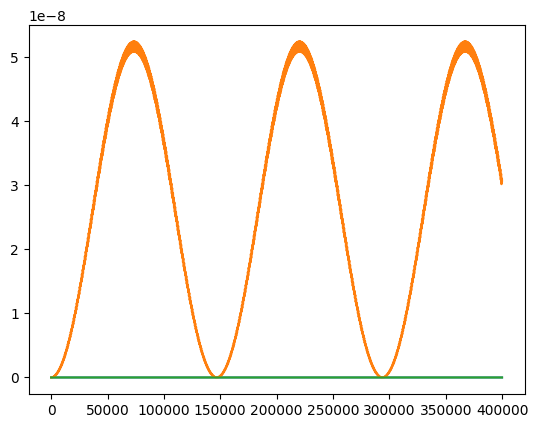

In [61]:
en = data_a_b_zero[-1]
# plt.plot(en[0, :][10:])
plt.plot(en[1, :][10:])
plt.plot(en[2, :][10:])
# plt.plot(en[3, :][10:])
plt.plot(en[4, :][10:])

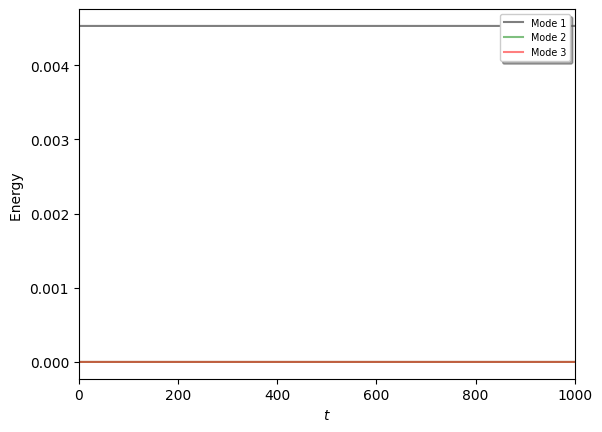

In [62]:
plot_mode_energies(data_a_b_zero, xlim=(0, 1000))

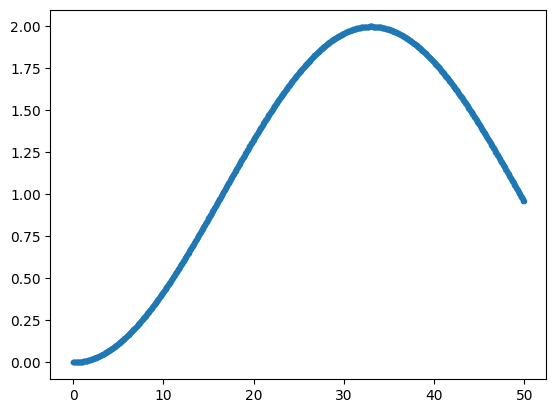

In [63]:
plot_consecutive_distances(data_a_b_zero, n_points=1000)

We observe that only the first two modes are excited. Moreover, because alpha and beta are both zero, there is no transfer of energy across modes and therefore their energy evolution in time are static.

### PCA

Explained variance ratio on all data: [5.00044836e-01 4.99948639e-01 5.87027645e-06 6.54589005e-07
 2.21116309e-11]


Text(0.5, 1.0, 'Explained variance ratios. Init amp = 1')

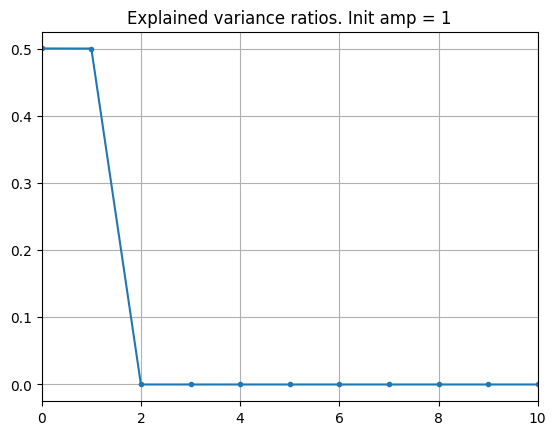

In [64]:
X_a_b_zero = create_input_data_vector(data_a_b_zero)

explained_variance_ratio = compute_explained_ratio(X_a_b_zero, pre_whitening=False)

plt.plot(explained_variance_ratio, ".-")
plt.xlim(0, 10)
plt.grid()
plt.title(f"Explained variance ratios. Init amp = {1}")

Only the first two PCs have significant (basically non-zero) explained variance ratio.

## 2. Using low beta -> No ergodicity

In [10]:
fpu = FPUT_Integrator(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
    t_step=INTEGRATION_TIME_STEP,
    t_max=3*T_MAX,
    alpha=0.0,
    beta=0.3
)

data_low_init_amp = fpu.run(method="verlet")

100%|██████████| 1199999/1199999 [05:08<00:00, 3887.80it/s]


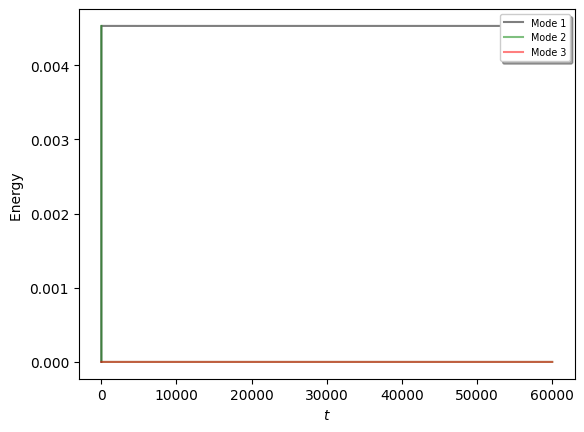

In [11]:
plot_mode_energies(data_low_init_amp)

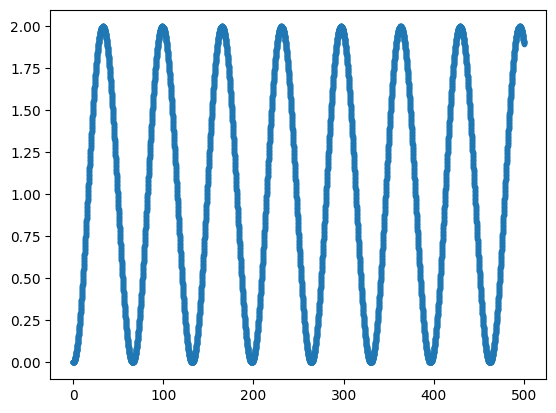

In [19]:
plot_consecutive_distances(data_low_init_amp, n_points=10000)

### PCA

Explained variance ratio on all data: [5.62407759e-01 4.37591458e-01 6.50179720e-07 1.33598376e-07
 2.88546550e-12]


Text(0.5, 1.0, 'Explained variance ratios. Beta = 0.3')

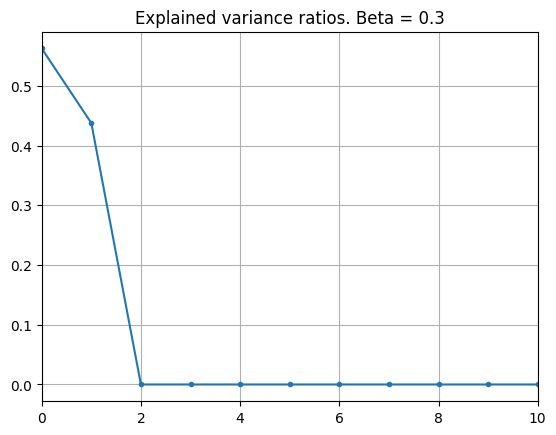

In [13]:
X_low_init_amp = create_input_data_vector(data_low_init_amp, sample_manifold=True)

explained_variance_ratio = compute_explained_ratio(X_low_init_amp, pre_whitening=False)

plt.plot(explained_variance_ratio, ".-")
plt.xlim(0, 10)
plt.grid()
plt.title(f"Explained variance ratios. Beta = 0.3")

## Using higher beta -> Ergodicity

100%|██████████| 39999/39999 [00:10<00:00, 3873.37it/s]


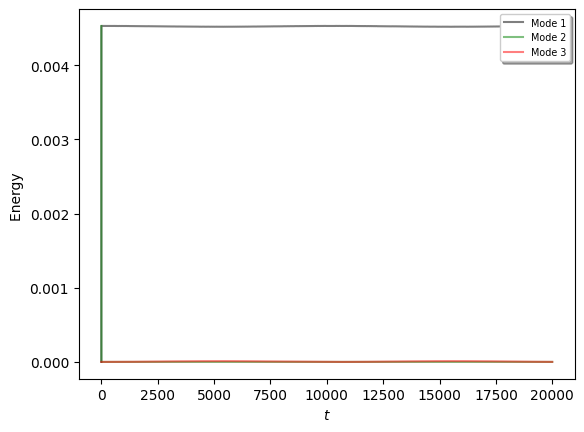

In [39]:
fpu = FPUT_Integrator(
    num_atoms=NUM_ATOMS,
    num_modes=NUM_MODES,
    initial_mode_number=INITIAL_MODE_NUMBER,
    initial_mode_amplitude=INITIAL_MODE_AMPLITUDE,
    t_step=0.5,
    t_max=T_MAX,
    alpha=0.0,
    beta=3.0
)

data_high_beta = fpu.run(method="verlet")

plot_mode_energies(data_high_beta)

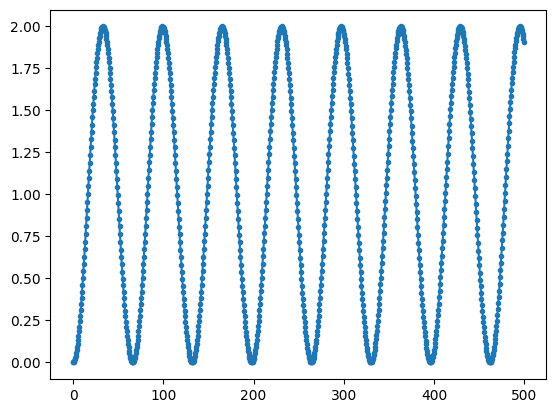

In [36]:
plot_consecutive_distances(data_high_beta, n_points=1000) 

### PCA

Explained variance ratio on all data: [5.02841839e-01 4.97097186e-01 5.46993983e-05 6.18635777e-06
 8.54509743e-08]


Text(0.5, 1.0, 'Explained variance ratios. Beta = 3.0')

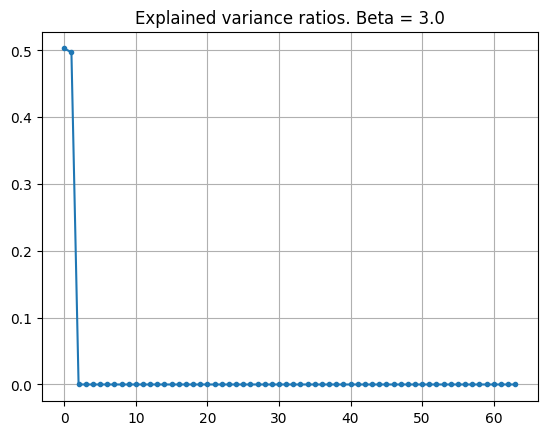

In [37]:
X_high_init_amp = create_input_data_vector(data_high_init_amp, sample_manifold=True)

explained_variance_ratio = compute_explained_ratio(X_high_init_amp, pre_whitening=False)

plt.plot(explained_variance_ratio, ".-")
#plt.xlim(0, 20)
plt.grid()
plt.title(f"Explained variance ratios. Beta = 3.0")